In this jupyter notebook, we will perform linear regresion in Housing Price Dataset and understand about different metrics and 
information related to linear regression model

In [33]:
#Loading necessary libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#reading data
df = pd.read_csv('Housing.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

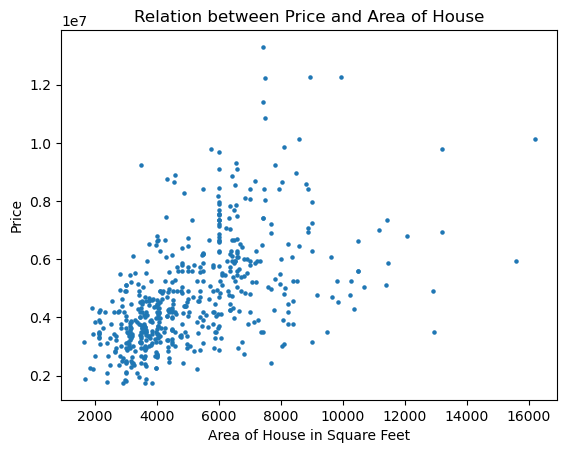

In [32]:
#plotting the price of house against the area of the house
plt.scatter(df['area'],df['price'], s = 5)
plt.title('Relation between Price and Area of House')
plt.xlabel('Area of House in Square Feet')
plt.ylabel('Price')
plt.show()

In [52]:
#Splitting the data into train-test splits
X = df['area'].values.reshape(-1,1)
y = df['price']
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)

In [53]:
#Lets fit a simple linear regression for our training set
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)
print(model.intercept_)


[425.72984194]
2512254.2639593435


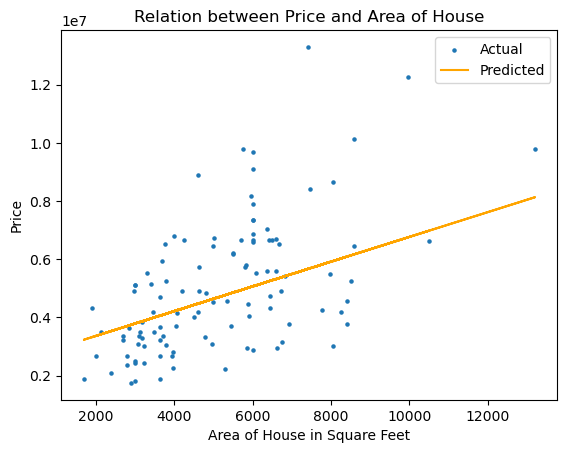

In [54]:
#Lets plot the predicted value of price in the plot
y_pred = model.predict(x_test)
plt.scatter(x_test,y_test, s = 5, label = 'Actual')
plt.plot(x_test, y_pred , color = 'orange', label = 'Predicted')
plt.title('Relation between Price and Area of House')
plt.xlabel('Area of House in Square Feet')
plt.ylabel('Price')
plt.legend()
plt.show()

In [55]:
#Lets analyse the metrics RMSE and R-squared for the model
mse = mean_squared_error(y_test,y_pred , squared = False)
r2 = r2_score(y_test,y_pred)
print(f'Root Mean square error of the model in test set = {mse} ')
print(f'R_squared value = {r2} ')

Root Mean square error of the model in test set = 1917103.7021424233 
R_squared value = 0.27287851871974644 


In [88]:
#Multiple Linear Regression
#we need to make sure our features are in 2D array.
#So, we convert our dataframe into 2D numpy array by using .values argument
X = df[['area','bedrooms','bathrooms','stories']] 
y = df['price']

In [89]:
#fitting the model
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.2 , random_state = 42)
model = linear_model.LinearRegression()
model.fit(x_train,y_train)
print(model.coef_)
print(model.intercept_)

[3.49009738e+02 1.74685138e+05 1.25815095e+06 4.83859660e+05]
-64342.4209056776


In [90]:
y_pred = model.predict(x_test)

In [91]:
#Lets analyse the metrics RMSE and R-squared for the model
mse = mean_squared_error(y_test,y_pred , squared = False)
r2 = r2_score(y_test,y_pred)
print(f'Root Mean square error of the model in test set = {mse} ')
print(f'R_squared value = {r2} ')

Root Mean square error of the model in test set = 1567718.610600157 
R_squared value = 0.5137585349037072 


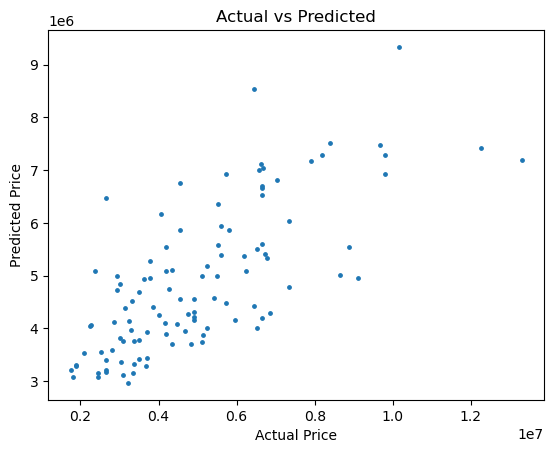

In [77]:
plt.scatter(y_test, y_pred , s = 6)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted')
plt.show()

In [78]:
pd.DataFrame({'actual' : y_test , 'predicted' : np.round(y_pred,1)})

,actual,predicted
316,4060000,6177576.8
77,6650000,6696157.2
360,3710000,3437037.8
90,6440000,4430632.0
493,2800000,3583802.2
...,...,...
15,9100000,4954326.8
357,3773000,5278905.9
39,7910000,7180197.1
54,7350000,6037792.6


To find the feature importance for our multiple regression model, we first need to standardizd all the features.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression

In [79]:
model = make_pipeline(StandardScaler(), LinearRegression())

In [80]:
model.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [83]:
coefficients = model.named_steps['linearregression'].coef_

In [93]:
pd.Series(coefficients , index = X.columns).sort_values(key = abs, ascending = False)

area         768444.171764
bathrooms    599941.271809
stories      414719.972652
bedrooms     130480.399671
dtype: float64